Clustering_Vent_Pulse

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_excel('/Users/xinyuyangren/Desktop/Paper/ventbyseasons.xlsx')
df

,Spring,Summer,Autumn,Winter,Mean,Std,RSD
1,5.303008,5.993574,5.276186,4.798611,5.342845,0.425931,0.079720
2,5.375268,5.319643,5.883597,4.932000,5.377627,0.338362,0.062920
3,1.877374,1.695880,2.035876,2.045957,1.913772,0.142464,0.074441
4,5.109499,4.637418,3.810159,4.644916,4.550498,0.468256,0.102902
5,2.834030,2.797832,3.312382,2.943510,2.971938,0.203741,0.068555
6,5.455359,6.164296,6.237695,6.353654,6.052751,0.351449,0.058064
7,2.685343,3.452541,3.555953,3.175053,3.217222,0.337190,0.104808
8,3.701266,4.146841,4.262342,4.276592,4.096760,0.233816,0.057074
9,2.500682,2.707735,2.564800,2.589074,2.590573,0.074956,0.028934
10,10.424042,10.493249,10.586293,9.758939,10.315631,0.326522,0.031653


(0.625, 11.125)

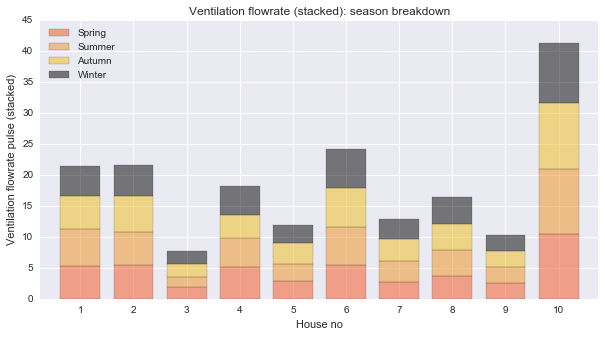

In [3]:
#Stacked bar plot
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df['Spring']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        df['Spring'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Spring',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the mid_score data
        df['Summer'],
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=df['Spring'],
        # with the label mid score
        label='Summer',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Autumn'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['Spring'],df['Summer'])],
        # with the label post score
        label='Autumn',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1BD1A')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Winter'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df['Spring'],df['Summer'],df['Autumn'])],
        # with the label post score
        label='Winter',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='k')
# set the x ticks with names
plt.xticks(tick_pos, df.index)

# Set the label and legends
ax1.set_ylabel("Ventilation flowrate pulse (stacked)")
ax1.set_xlabel("House no")
plt.legend(loc='upper left')
plt.title('Ventilation flowrate (stacked): season breakdown')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

In [4]:
data = df[['Mean','Std']]
#data = data.drop(data.index[[5,7]])#drop the rows with too small means
data

,Mean,Std
1,5.342845,0.425931
2,5.377627,0.338362
3,1.913772,0.142464
4,4.550498,0.468256
5,2.971938,0.203741
6,6.052751,0.351449
7,3.217222,0.337190
8,4.096760,0.233816
9,2.590573,0.074956
10,10.315631,0.326522


In [5]:
from sklearn.preprocessing import scale
data = scale(data)

In [9]:
estimator = KMeans(n_clusters=3)
estimator.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
labels = estimator.labels_
print estimator.labels_

[1 1 0 1 0 1 1 0 0 2]


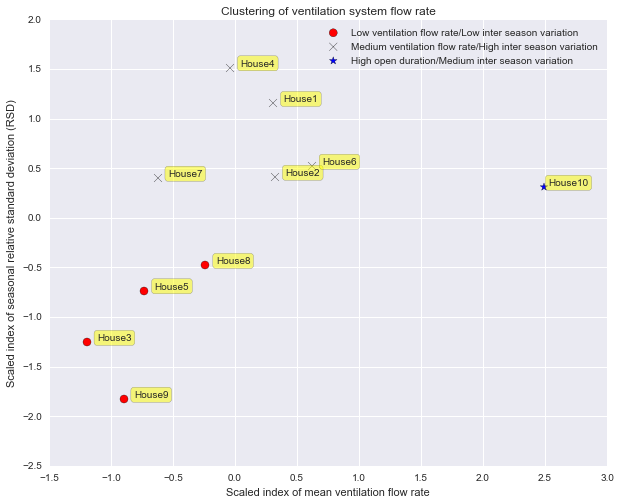

In [12]:
xs = data[:,0]
ys = data[:,1]
plt.figure(figsize=(10,8))
for i in range(0, len(labels)):
    if labels[i] == 0:
        c1 = plt.scatter(xs[i],ys[i],c='r',marker='o',s = 8*8)
    elif labels[i] == 1:
        c2 = plt.scatter(xs[i],ys[i],c='k',marker='x',s = 8*8)
    elif labels[i] == 2:
        c3 = plt.scatter(xs[i],ys[i],c='b',marker='*',s = 8*8)
    elif labels[i] == 3:
        c4 = plt.scatter(xs[i],ys[i],c='m',marker='^',s = 8*8)
plt.legend([c1, c2, c3], ['Low ventilation flow rate/Low inter season variation', 'Medium ventilation flow rate/High inter season variation','High open duration/Medium inter season variation'])
plt.xlabel('Scaled index of mean ventilation flow rate')
plt.ylabel('Scaled index of seasonal relative standard deviation (RSD)')
plt.title('Clustering of ventilation system flow rate')

housenum = ['House{0}'.format(i) for i in range(1,11)]
for housenum, x, y in zip(housenum, xs, ys):
    plt.annotate(
        housenum, 
        xy = (x, y), xytext = (45, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.5))